## Importing all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import datetime
from time import strftime

### Reading and printing the datasets

In [3]:
ds = pd.read_csv("F:/Courses_Files/Data_Analyst_Files_&_Resources/python_DA_Projects/togithub_DA/Pharma_python_project/Pharma_datasets.csv") 
ds.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### To know how many rows & cloumns in that datasets

In [6]:
ds.shape

(110527, 14)

### To know the information about the rows & columns, datatypes, etc... in that datasets

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### converting the data & time in objects of the above datasets into standard form (ie; datetime datatype), so this conversion is a form of derived matrix

In [6]:
ds['ScheduledDay'] = pd.to_datetime(ds['ScheduledDay']).dt.date.astype('datetime64[ns]')
ds['AppointmentDay'] = pd.to_datetime(ds['AppointmentDay']).dt.date.astype('datetime64[ns]')
ds.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Now the datatype of ScheduledDay & AppointmentDay is converted into datetime64[ns]

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

#### To know the day of that date, monday=0 , sunday=6

In [7]:
ds['sched_weekday'] = ds['ScheduledDay'].dt.dayofweek
ds['appon_weekday'] = ds['AppointmentDay'].dt.dayofweek

#### To know the total scheduled values per day

In [8]:
ds['sched_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sched_weekday, dtype: int64

#### To know the total appointments value per day

In [9]:
ds['appon_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: appon_weekday, dtype: int64

In [23]:
ds.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'appon_weekday', 'sched_weekday'],
      dtype='object')

In [24]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  sch_weekday     110527 non-null  int

#### Changing the names of some columns

In [10]:
ds = ds.rename(columns={'Hipertension' : 'Hypertension','Handcap':'Handicap','SMS_received':'SMSRecevied','No-show':'NoShow'})

In [34]:
ds.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSRecevied', 'NoShow',
       'sch_weekday', 'appon_weekday', 'sched_weekday'],
      dtype='object')

In [35]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSRecevied     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

#### Dropping few columns

In [37]:
ds.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1,inplace=True)

In [11]:
ds

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,NoShow,sched_weekday,appon_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2,1
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,1


#### To know the total scheduled values per day

In [65]:
ds['sched_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sched_weekday, dtype: int64

#### To know the number of application scheduled in all weekdays
#### To know the day of that date, monday=0 , sunday=6

Text(0.5, 1.02, 'Count vs Scheduled weekday')

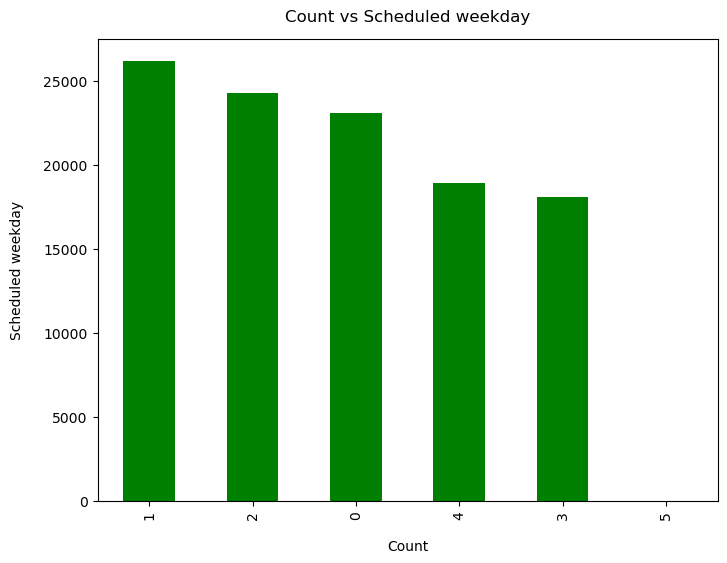

In [12]:
ds['sched_weekday'].value_counts().plot(kind='bar',figsize=(8,6),color='green')
plt.xlabel("Count",labelpad=14)
plt.ylabel("Scheduled weekday",labelpad=14)
plt.title("Count vs Scheduled weekday",y=1.02)

#### To know the total appointments value per day

In [64]:
ds['appon_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: appon_weekday, dtype: int64

Text(0.5, 1.02, 'Count vs Appointment days')

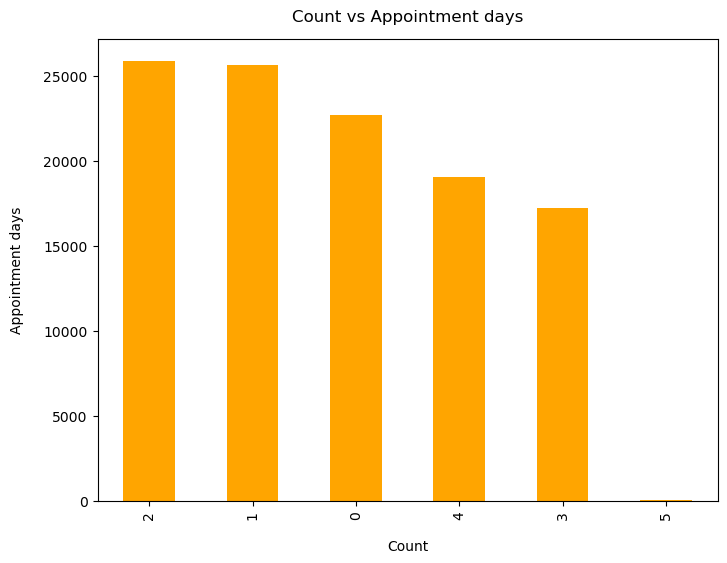

In [13]:
# To know the number of appoinment application in all weekdays
# to know the day of that date, monday=0 , sunday=6
ds['appon_weekday'].value_counts().plot(kind='bar',figsize=(8,6),color='orange')
plt.xlabel("Count",labelpad=14)
plt.ylabel("Appointment days",labelpad=14)
plt.title("Count vs Appointment days",y=1.02)

### Finding the statistical values

In [14]:
ds.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSRecevied,sched_weekday,appon_weekday
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


Text(0.5, 1.02, 'Count of Target Variable per category')

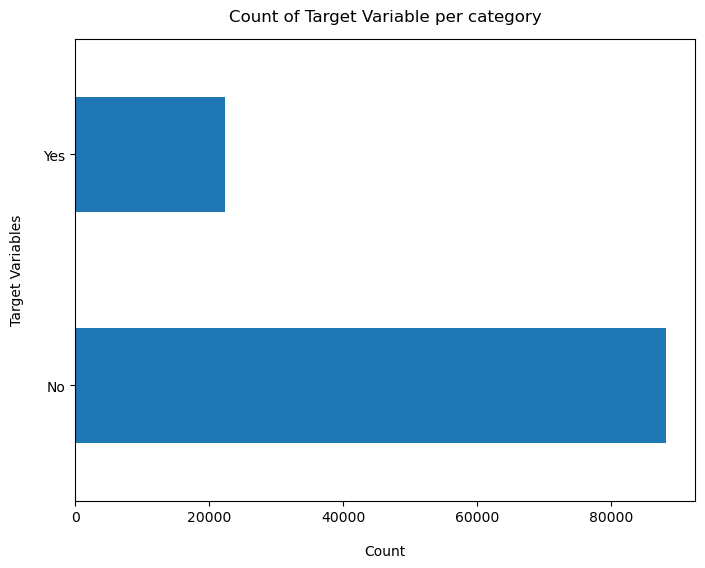

In [15]:
ds['NoShow'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variables",labelpad=14)
plt.title("Count of Target Variable per category",y=1.02)

#### Calulating the % of appointments

In [16]:
100 * ds['NoShow'].value_counts()/len(ds['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

#### Total values of appointments

In [17]:
ds['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [ ]:
ds.drop(['sch_weekday'],axis=1,inplace=True)

#### Displaying the null values

In [19]:
missing = pd.DataFrame((ds.isnull().sum())).reset_index()
print(missing)

             index  0
0        PatientId  0
1    AppointmentID  0
2           Gender  0
3     ScheduledDay  0
4   AppointmentDay  0
5              Age  0
6    Neighbourhood  0
7      Scholarship  0
8     Hypertension  0
9         Diabetes  0
10      Alcoholism  0
11        Handicap  0
12     SMSRecevied  0
13          NoShow  0
14   sched_weekday  0
15   appon_weekday  0


### Data Cleaning
### Create a copy of datasets for data manupulating & processing

In [20]:
new_ds = ds.copy()

In [21]:
new_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSRecevied     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sched_weekday   110527 non-null  int

In [22]:
# get max age
print(ds['Age'].max())

115


#### Creating bins of age of 12 months

In [23]:
labels = ["{0} - {1}".format(i,i+20) for i in range(1,118,20)]
ds['Age_group'] = pd.cut(ds.Age,range(1,130,20),right=False,labels=labels)

In [119]:
ds.drop(['Age'],axis=1,inplace=True)

### Data Exploration

In [24]:
list(ds.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSRecevied',
 'NoShow',
 'sched_weekday',
 'appon_weekday',
 'Age_group']

#### Having a look into the values of count of each columns and there count in respect to NoShow column

In [ ]:
for i, predictor in enumerate(ds.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(ds[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=ds,x=predictor,hue='NoShow')

---------- PatientId ----------
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64


#### Converting the values into 1 & 0

In [ ]:
ds['NoShow'] = np.where(ds.NoShow == 'Yes',1,0)

In [123]:
ds.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

#### converting all categorical values into dummy varibles

In [ ]:
ds_dummies = pd.get_dummies(ds)
ds_dummies.head()

#### Building a correlation of all predictor with 'NoShow'

C:\Users\RAHUL RAJAN\AppData\Local\Temp\ipykernel_468\791703905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds_dummies.corr()['NoShow'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

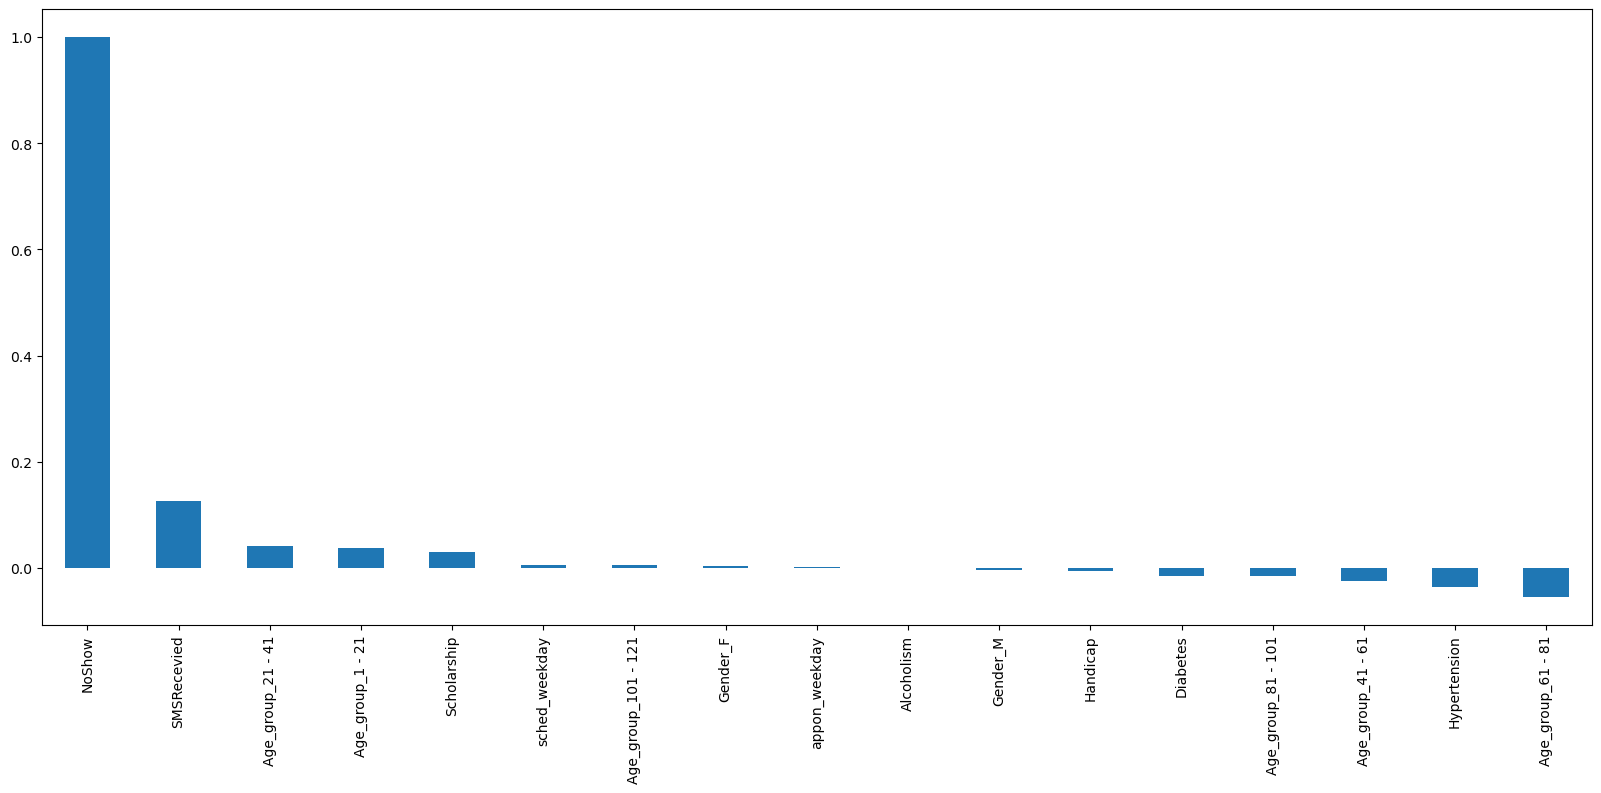

In [126]:
plt.figure(figsize=(20,8))
ds_dummies.corr()['NoShow'].sort_values(ascending=False).plot(kind='bar')

### Building a correlation of all predictor with 'NoShow' in the form of 'Heatmap'

C:\Users\RAHUL RAJAN\AppData\Local\Temp\ipykernel_468\2145374594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds_dummies.corr(),cmap='Paired')


<Axes: >

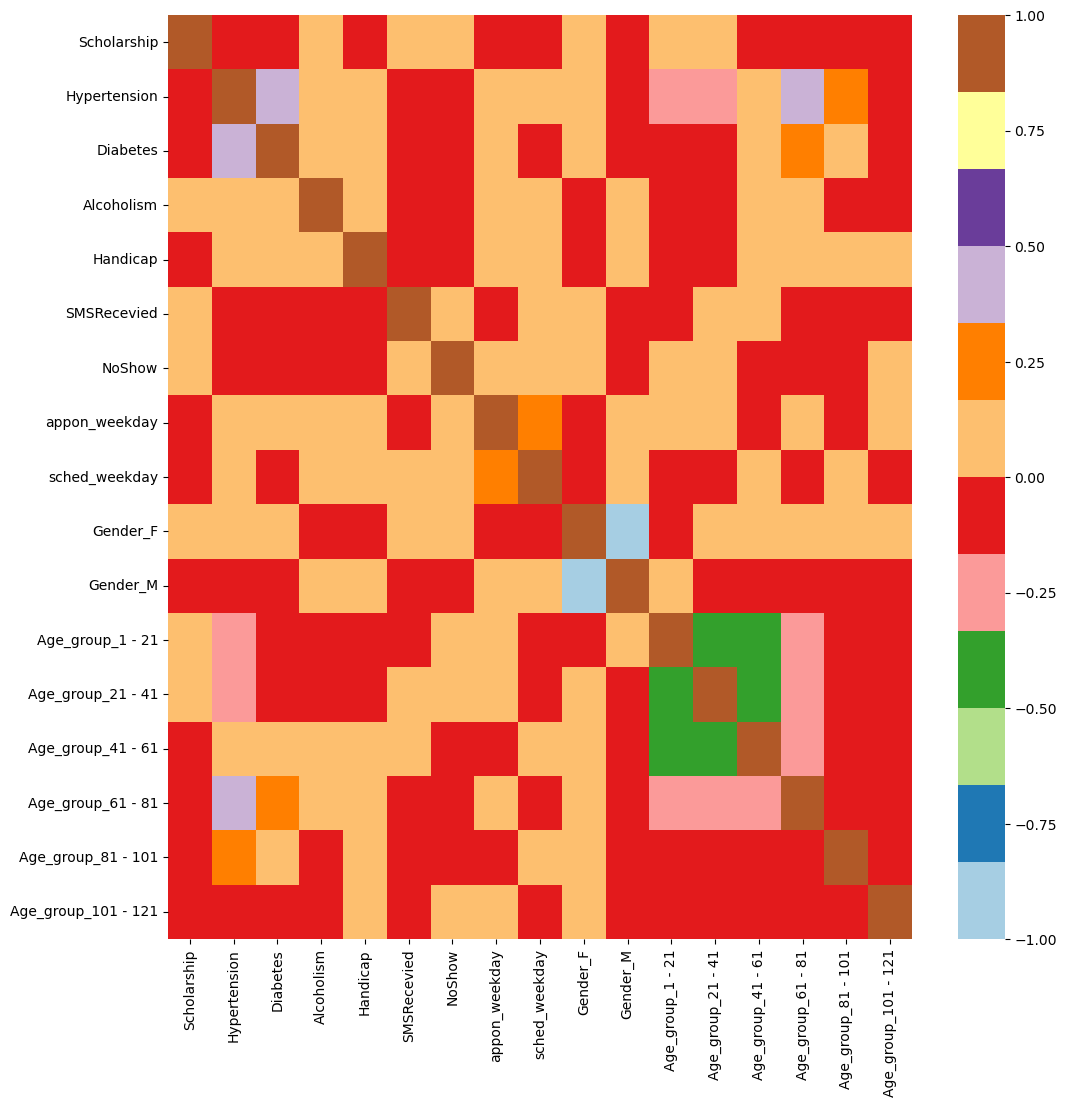

In [130]:
plt.figure(figsize=(12,12))
sns.heatmap(ds_dummies.corr(),cmap='Paired')

### Bivariate Analysis

In [ ]:
new_df1_target0 = ds.loc[ds["NoShow"]==0]
new_df1_target1 = ds.loc[ds["NoShow"]==1]

In [136]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    
    plt.show()

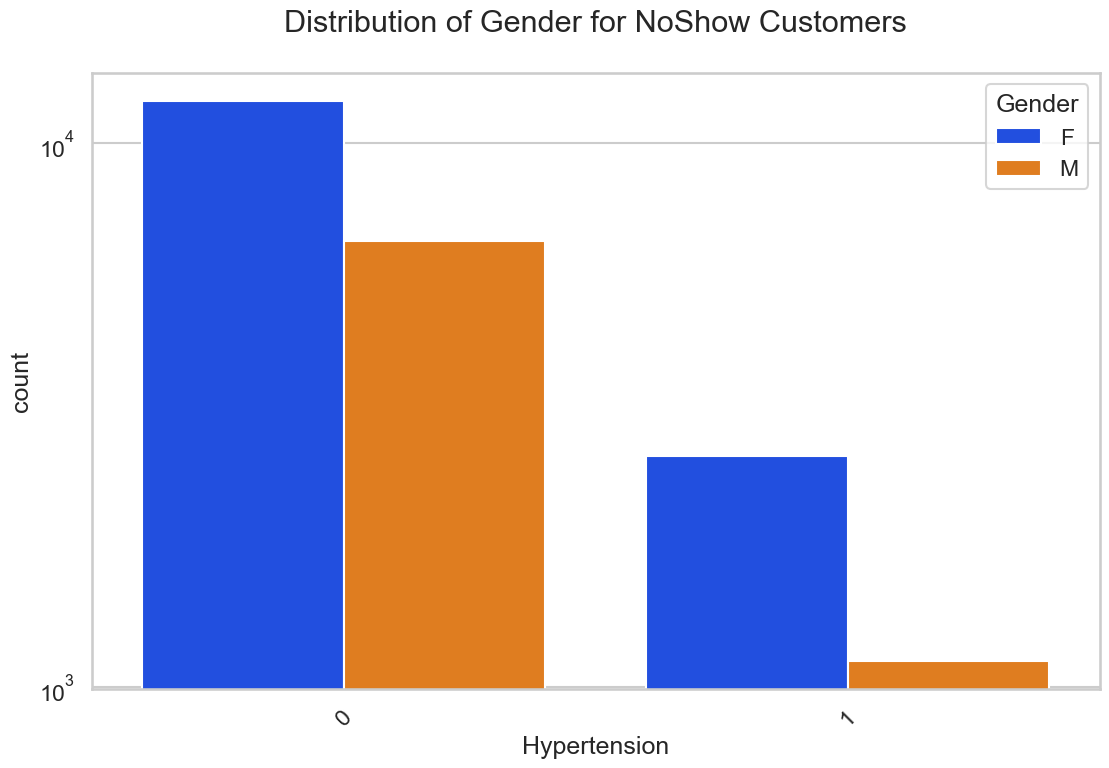

In [137]:
uniplot(new_df1_target1,col="Hypertension",title="Distribution of Gender for NoShow Customers",hue="Gender")

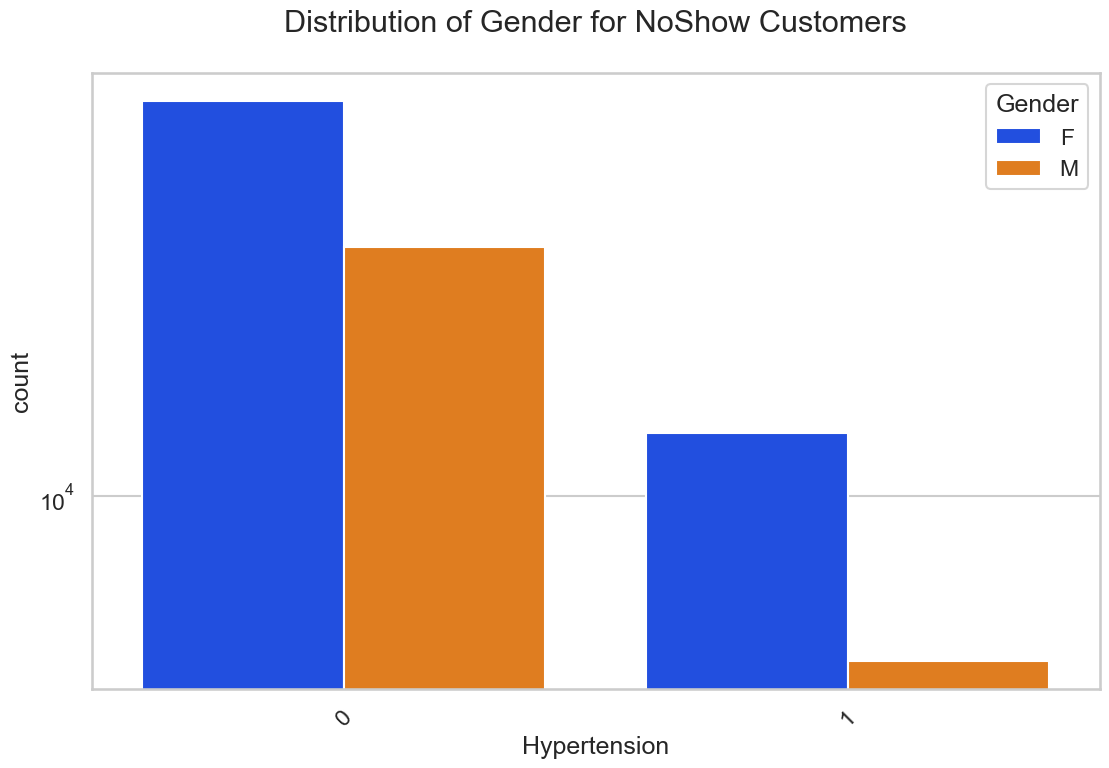

In [138]:
uniplot(new_df1_target0,col="Hypertension",title="Distribution of Gender for NoShow Customers",hue="Gender")

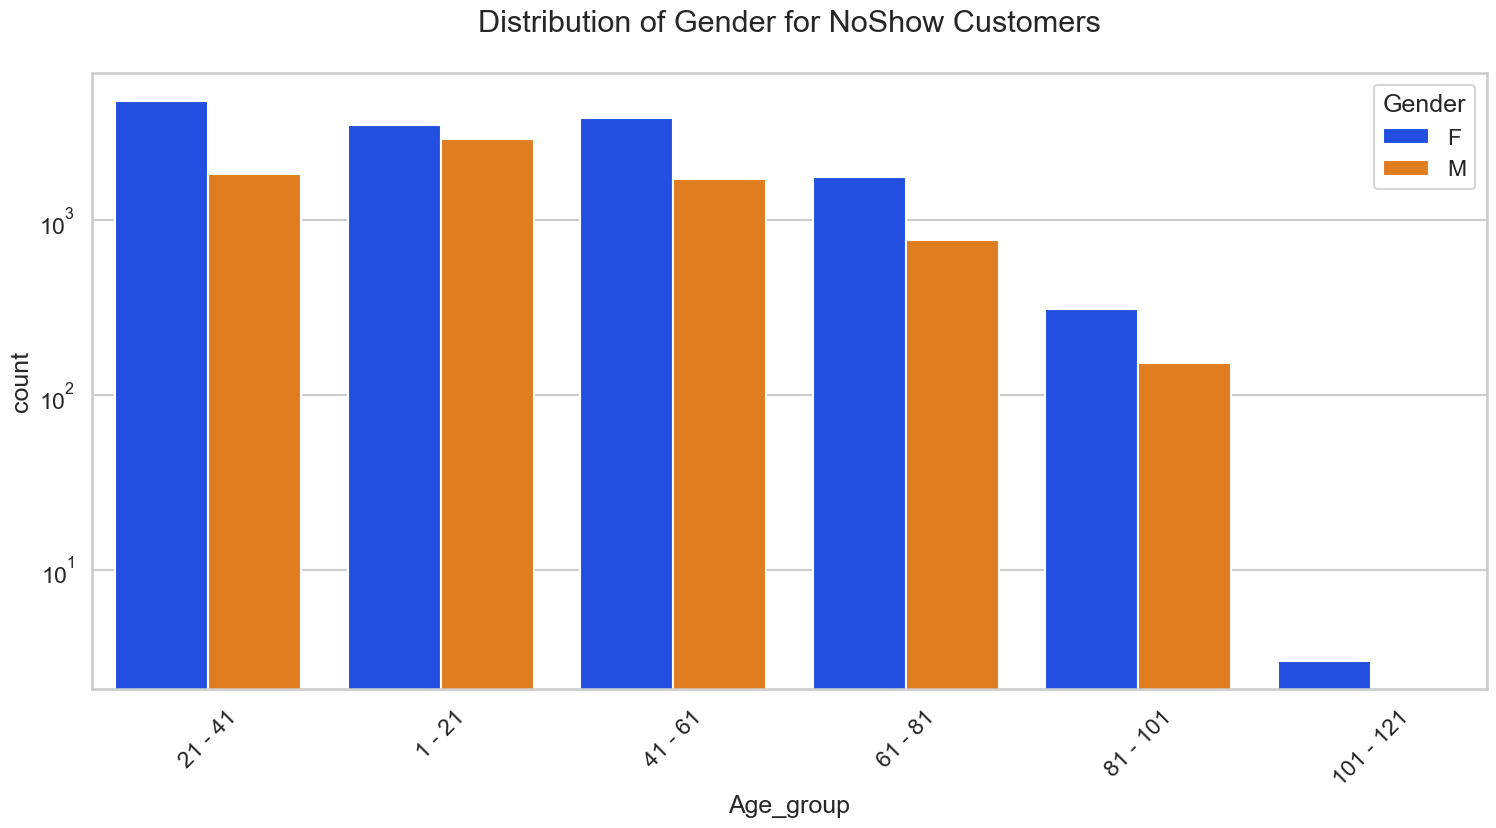

In [139]:
uniplot(new_df1_target1,col="Age_group",title="Distribution of Gender for NoShow Customers",hue="Gender")

#### total count of male & female according to age group

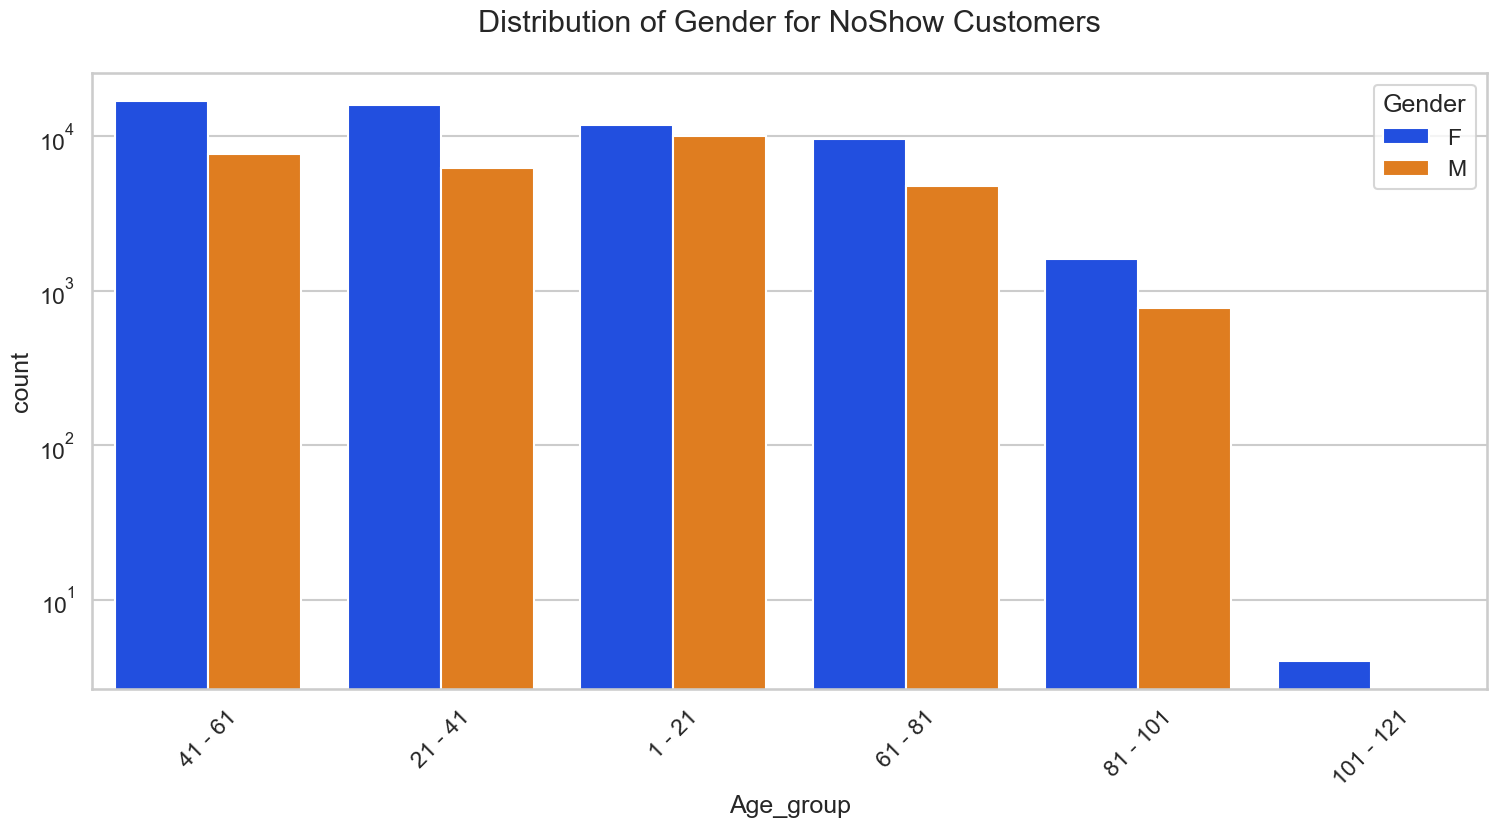

In [141]:
# total count of male & female according to age group
uniplot(new_df1_target0,col="Age_group",title="Distribution of Gender for NoShow Customers",hue="Gender")

In [ ]:
# total count of male & female according to age group
uniplot(new_df1_target1,col="Age_group",title="Distribution of Gender for NoShow Customers",hue="Gender")

### Findings

#### 1) Female patients have taken more appointments then male patients.
#### 2) Ratio of NoShow and Show is almost equal for group except Age 0 and Age 1 with 80% show rate for each age group
#### 3) Each neighbourhood have almost 80% show rate.
#### 4) There are 99666 patients without insurance and of them arounf 80% have come for visit out of 21801 patients with insurance around 75% of them have come for visit.
#### 5) There are around 88,726 patients without  Hypertension and out of them around 78% have come for visit and out of 21801 patients with Hypertension around 85% of them have come for visit.
#### 6) There are around 102,584 patients without Diabetes and out of them around 80% have come for visit and out of 7,943 patients with Diabetes around 83% of them have come for visit.
#### 7) There are around 75,045 patients who have not recevied SMS and out of them around 84% have come for visit and out of 35,482 patients who have recevied SMS around 72% of them have come for visit.
#### 8) There is no Appointments on sunday and on saturday appointments are very less in comparision to other week days.